In [196]:
import numpy as np
import pandas as pd
import shapely 
import matplotlib as mpl
import matplotlib.pyplot as plt
import fpsnippets
import seaborn as sns
import seaborn.objects as so
import geopandas as gpd

<Axes: >

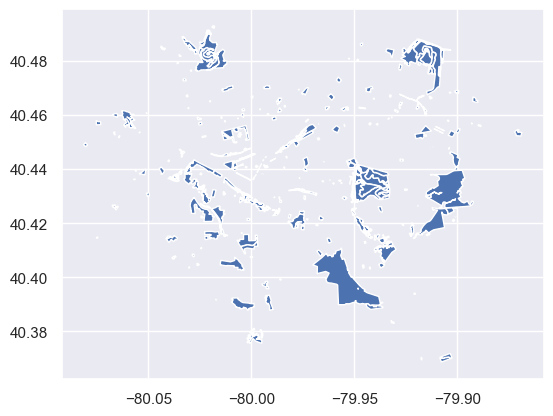

In [197]:
parks = gpd.read_file("parks/PGHWebParks.shp")
parks.plot()

In [198]:
parkz = pd.read_csv("parks/parks.csv")
num_parks = parkz.groupby("sector").sum()["acreage"]
num_parks.head()
num_parks.sort_values(ascending=False)

sector
10.0    1079.722325
8.0      662.504800
12.0     421.592659
6.0      349.570826
5.0      319.957029
2.0      311.913053
9.0      165.063443
4.0      118.353087
7.0      102.364840
3.0       75.968822
15.0      73.774938
13.0      72.403109
16.0      57.767179
11.0      39.536096
1.0       31.928987
14.0       6.541371
Name: acreage, dtype: float64

<Axes: >

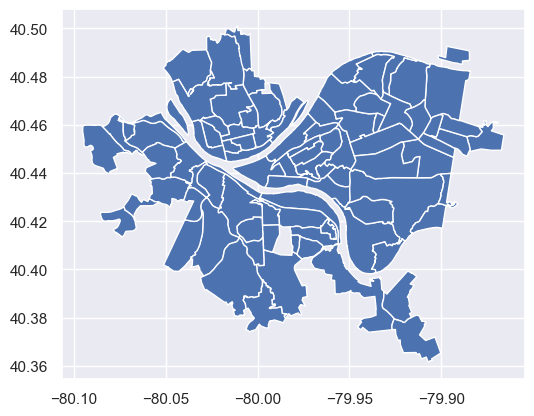

In [199]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

In [200]:

parks["center"] = parks["geometry"].centroid
parks["lat"] = parks["center"].x
parks["long"] = parks["center"].y
parks.head()

C:\Users\Dominic\AppData\Local\Temp\ipykernel_34492\2653249366.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks["center"] = parks["geometry"].centroid


,OBJECTID_1,objectid,acreage,sqft,final_cat,type_,sector,origpkname,updatepknm,alterntnam,...,last_edi_1,maintenanc,dpw_ac,GlobalID_1,Shape__Are,Shape__Len,geometry,center,lat,long
0,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15,Cliffside Parklet,August Wilson Park,Cliffside Park,...,2023-08-02,Parks - Schenley,0.959034302188266,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012,"POLYGON ((-79.98614 40.44665, -79.98613 40.446...",POINT (-79.98570 40.44658),-79.985699,40.446583
1,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2,Young Field,Young Field Park,Young Park,...,2023-08-02,Parks - Riverview,2.06011722852731,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181,"POLYGON ((-80.03313 40.47289, -80.03314 40.473...",POINT (-80.03249 40.47296),-80.032487,40.472955
2,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,...,2023-08-02,Parks - Frick,0.468682427403543,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235,"POLYGON ((-79.92039 40.39402, -79.92047 40.393...",POINT (-79.92074 40.39394),-79.920739,40.393940
3,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12,Friendship Park,Friendship Park,Friendship Park,...,2023-08-02,Parks - Highland,1.95542981911229,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871,"POLYGON ((-79.94539 40.46264, -79.94486 40.462...",POINT (-79.94616 40.46257),-79.946165,40.462570
4,1206,87.0,5.108070,222506.623799,Neighborhood Park,NP,12,Heths Playground,Heth's Park,Heth's Park,...,2023-08-02,Parks - Highland,5.10806964711613,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997,"POLYGON ((-79.92675 40.47832, -79.92722 40.477...",POINT (-79.92767 40.47768),-79.927670,40.477683


In [201]:
def getNeighborhood():
    for id, row in parks.iterrows():
        print(fpsnippets.geo_to_neighborhood(row[-1],row[-2]))

#getNeighborhood()

def addNeighborhood():
    for id, row in parks.iterrows():
        parks.loc[id, "neighborhood"] = (fpsnippets.geo_to_neighborhood(row[-1],row[-2]))
addNeighborhood()

parks.head()

C:\Users\Dominic\AppData\Local\Temp\ipykernel_34492\2663980264.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  parks.loc[id, "neighborhood"] = (fpsnippets.geo_to_neighborhood(row[-1],row[-2]))
C:\Users\Dominic\AppData\Local\Temp\ipykernel_34492\2663980264.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  parks.loc[id, "neighborhood"] = (fpsnippets.geo_to_neighborhood(row[-1],row[-2]))
C:\Users\Dominic\AppData\Local\Temp\ipykernel_34492\2663980264.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

,OBJECTID_1,objectid,acreage,sqft,final_cat,type_,sector,origpkname,updatepknm,alterntnam,...,maintenanc,dpw_ac,GlobalID_1,Shape__Are,Shape__Len,geometry,center,lat,long,neighborhood
0,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15,Cliffside Parklet,August Wilson Park,Cliffside Park,...,Parks - Schenley,0.959034302188266,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012,"POLYGON ((-79.98614 40.44665, -79.98613 40.446...",POINT (-79.98570 40.44658),-79.985699,40.446583,Crawford-Roberts
1,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2,Young Field,Young Field Park,Young Park,...,Parks - Riverview,2.06011722852731,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181,"POLYGON ((-80.03313 40.47289, -80.03314 40.473...",POINT (-80.03249 40.47296),-80.032487,40.472955,Marshall-Shadeland
2,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8,Revenue Park,Roland Lockridge Community Park,Roland Lockridge Community Park,...,Parks - Frick,0.468682427403543,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235,"POLYGON ((-79.92039 40.39402, -79.92047 40.393...",POINT (-79.92074 40.39394),-79.920739,40.393940,New Homestead
3,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12,Friendship Park,Friendship Park,Friendship Park,...,Parks - Highland,1.95542981911229,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871,"POLYGON ((-79.94539 40.46264, -79.94486 40.462...",POINT (-79.94616 40.46257),-79.946165,40.462570,Bloomfield
4,1206,87.0,5.108070,222506.623799,Neighborhood Park,NP,12,Heths Playground,Heth's Park,Heth's Park,...,Parks - Highland,5.10806964711613,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997,"POLYGON ((-79.92675 40.47832, -79.92722 40.477...",POINT (-79.92767 40.47768),-79.927670,40.477683,Highland Park


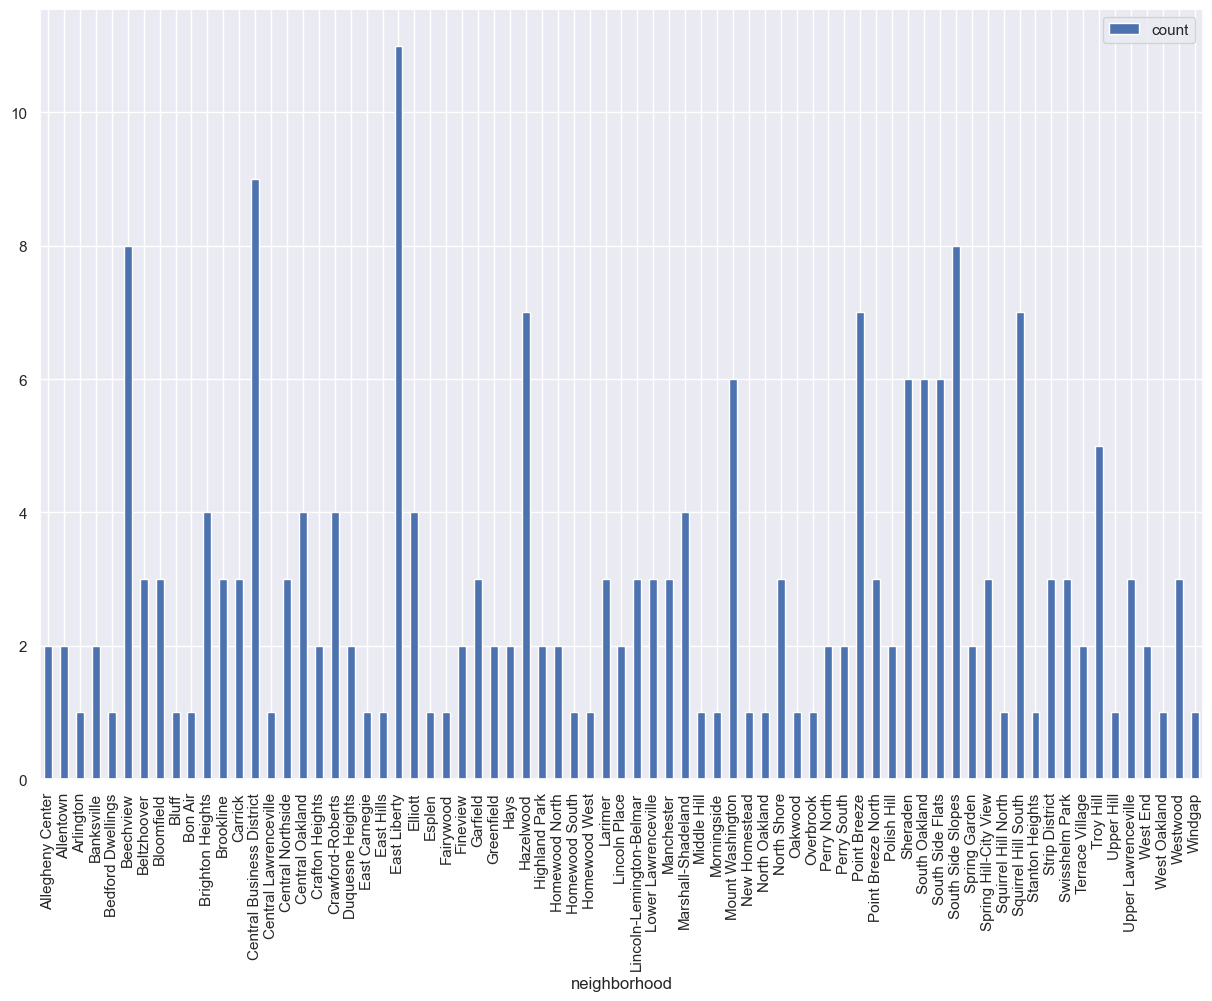

In [202]:
grph = parks["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90,figsize =(15,10),legend = True)


In [203]:
num_parks = parks.groupby("neighborhood").sum("acreage")

parks_map = neighborhoods.merge(num_parks, how='left', left_on='hood', right_on='neighborhood')

parks_map[['hood','acreage','geometry']].head()

,hood,acreage,geometry
0,Central Oakland,1.844071,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,0.258574,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,0.053646,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,2.120504,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,41.615985,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<Axes: >

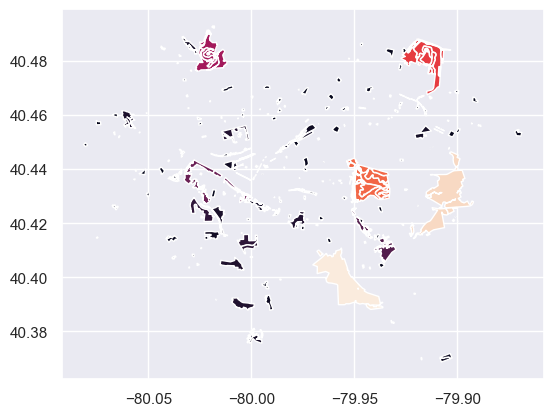

In [204]:
parks.plot(column='acreage')

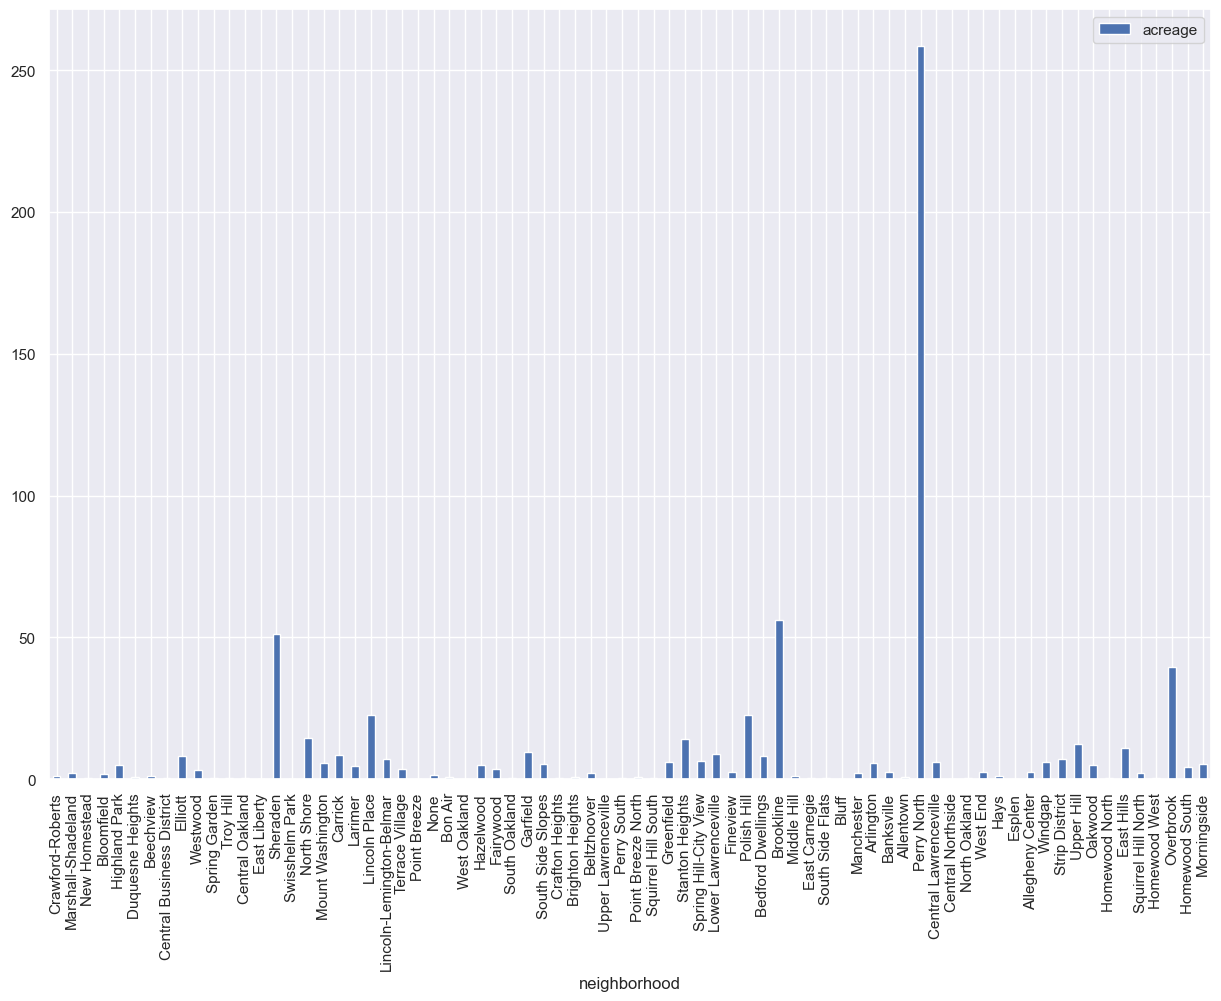

In [208]:
data = parks.drop_duplicates(subset = "neighborhood").sort_index()
grph = data.plot(kind='bar', rot=90,figsize =(15,10),legend = True, x = "neighborhood", y = "acreage")
